In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("drive/MyDrive/dados_enem/microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", encoding='latin_1', sep = ";")

In [ ]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685048,210052034039,2021,4,M,1,1,1,2,0,2,1.0,0,3205002.0,Serra,32.0,ES,1.0,1.0,1.0,3205002,Serra,32,ES,1,1,1,1,912.0,882.0,891.0,901.0,626.3,672.2,663.2,731.3,DABDBEEBECCADABAEDCBCDBCDABCBEACDAACCDEDDCACB,ECADAADBBDBBDABEECBAACEDBBAECBADBCEEDEBBCAEBB,ACABB99999DEEADAABA

In [ ]:
len(df)

2685053

In [ ]:
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,2.685053e+06,2685053.0,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,981318.000000,2.685053e+06,7.203100e+05,720310.000000,720310.000000,720310.000000,720310.000000,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,2.685053e+06,1.940703e+06,2.041773e+06,2.041773e+06,1.940703e+06,1.940703e+06,2.041773e+06,2.041773e+06,1.940703e+06,2.685053e+06,2.041773e+06,2.041773e+06,2.041773e+06,2.041773e+06,2.041773e+06,2.041773e+06,2.041773e+06,2.685052e+06
mean,2.100527e+11,2021.0,4.775135e+00,1.035078e+00,2.025606e+00,1.027433e+00,1.665496e+00,2.090469e+00,1.447890e+00,1.005875,1.374133e-01,3.189085e+06,31.745562,2.492488,1.033716,1.015221,3.109933e+06,3.095378e+01,7.236747e-01,7.629522e-01,7.629522e-01,7.236747e-01,9.123629e+02,8.827508e+02,8.926420e+02,9.024688e+02,4.929945e+02,5.218159e+02,5.038183e+02,5.379349e+02,4.572029e-01,1.128405e+00,1.204339e+02,1.401913e+02,1.168704e+02,1.299821e+02,1.163260e+02,6.238037e+02,3.773467e+00
std,9.969525e+05,0.0,3.584740e+00,3.753711e-01,1.025256e+00,2.071686e-01,7.182743e-01,3.820216e+00,6.166094e-01,0.076421,3.442832e-01,1.035318e+06,10.328386,0.953349,0.180497,0.195154,1.006695e+06,1.003941e+01,4.481788e-01,4.282365e-01,4.282365e-01,4.481788e-01,1.364464e+01,1.621991e+01,1.543160e+01,1.442123e+01,8.156349e+01,9.582614e+01,7.936821e+01,1.113913e+02,4.981651e-01,7.532121e-01,3.369056e+01,4.551197e+01,3.626760e+01,3.892326e+01,5.958048e+01,1.903158e+02,1.347783e+00
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.100015e+06,11.000000,1.000000,1.000000,1.000000,1.100015e+06,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.090000e+02,8.790000e+02,8.890000e+02,8.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,2.312403e+06,23.000000,2.000000,1.000000,1.000000,2.407104e+06,2.400000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.100000e+02,8.800000e+02,8.900000e+02,9.000000e+02,4.313000e+02,4.472000e+02,4.487000e+02,4.464000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100527e+11,2021.0,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,3.169901e+06,31.000000,2.000000,1.000000,1.000000,3.119401e+06,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.110000e+02,8.810000e+02,8.910000e+02,9.010000e+02,4.825000e+02,5.239000e+02,5.071000e+02,5.181000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.200000e+02,4.000000e+00
75%,2.100536e+11,2021.0,6.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000,0.000000e+00,3.550308e+06,35.000000,4.000000,1.000000,1.000000,3.550308e+06,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.120000e+02,8.820000e+02,8.920000e+02,9.020000e+02,5.478000e+02,5.912000e+02,5.603000e+02,6.178000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.600000e+02,4.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,

## Definição de tipos

* Dados numéricos: iniciam com a string NU
* Dados vetoriais: iniciam com a string TX
* Dados categóricos: todos os demais

In [ ]:
df.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

In [ ]:
for c_name in df.columns: 
  if (not c_name.startswith('NU') and not c_name.startswith('TX')):
    df[c_name] = df[c_name].astype('category')

In [ ]:
df.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
TP_FAIXA_ETARIA           category
TP_SEXO                   category
TP_ESTADO_CIVIL           category
TP_COR_RACA               category
TP_NACIONALIDADE          category
TP_ST_CONCLUSAO           category
TP_ANO_CONCLUIU           category
TP_ESCOLA                 category
TP_ENSINO                 category
IN_TREINEIRO              category
CO_MUNICIPIO_ESC          category
NO_MUNICIPIO_ESC          category
CO_UF_ESC                 category
SG_UF_ESC                 category
TP_DEPENDENCIA_ADM_ESC    category
TP_LOCALIZACAO_ESC        category
TP_SIT_FUNC_ESC           category
CO_MUNICIPIO_PROVA        category
NO_MUNICIPIO_PROVA        category
CO_UF_PROVA               category
SG_UF_PROVA               category
TP_PRESENCA_CN            category
TP_PRESENCA_CH            category
TP_PRESENCA_LC            category
TP_PRESENCA_MT            category
CO_PROVA_CN               category
CO_PROVA_CH         

In [ ]:
df.TP_FAIXA_ETARIA.cat.categories

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64')

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


## Análise Inicial dos dados

Aqui podemos observar um histograma da faixa etária dos participantes do ENEM.




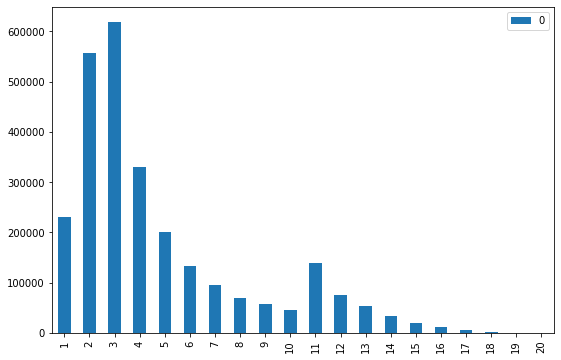

In [ ]:
faixa_etaria_count = []
for cat in df.TP_FAIXA_ETARIA.cat.categories:
  faixa_etaria_count.append((df.TP_FAIXA_ETARIA==cat).sum())
faixa_etaria_count = pd.DataFrame(faixa_etaria_count, index = df.TP_FAIXA_ETARIA.cat.categories)
faixa_etaria_count.plot.bar()

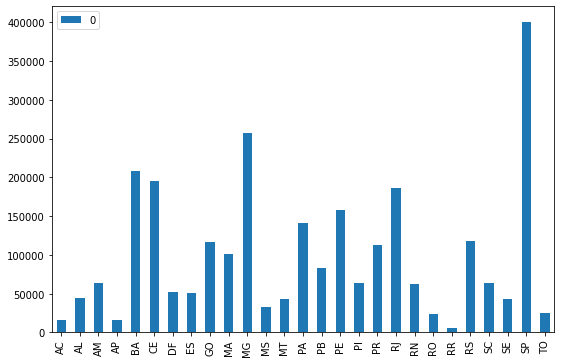

In [ ]:
#Candidatos por estado
candidatos_por_estado = []
for cat in df.SG_UF_PROVA.cat.categories:
  candidatos_por_estado.append((df.SG_UF_PROVA==cat).sum())
candidatos_por_estado = pd.DataFrame(candidatos_por_estado, index = df.SG_UF_PROVA.cat.categories)
candidatos_por_estado.plot.bar()

In [ ]:
# Alunos presentes na prova
df_presentes = df[(df.TP_PRESENCA_CN == 1) & (df.TP_PRESENCA_CH == 1) & (df.TP_PRESENCA_LC == 1) & (df.TP_PRESENCA_MT == 1)]
df_ausentes = df[(df.TP_PRESENCA_CN != 1) | (df.TP_PRESENCA_CH != 1) | (df.TP_PRESENCA_LC != 1) | (df.TP_PRESENCA_MT != 1)]

In [ ]:
# Número de faltas
len(df) - len(df_presentes)

750512

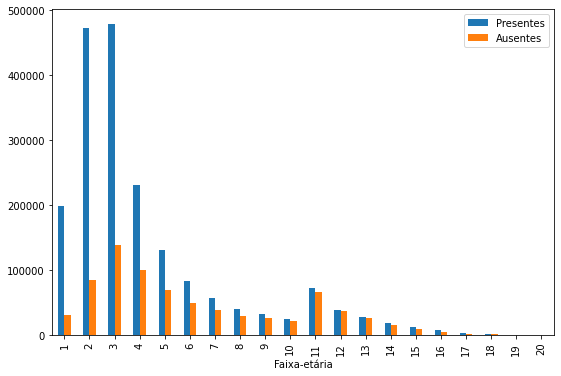

In [ ]:
#Candidatos presentes x candidatos ausentes
faixa_etaria_count_presente = []
faixa_etaria_count_ausente = []

for cat in df.TP_FAIXA_ETARIA.cat.categories:
  faixa_etaria_count_presente.append((df_presentes.TP_FAIXA_ETARIA==cat).sum())
  faixa_etaria_count_ausente.append((df_ausentes.TP_FAIXA_ETARIA==cat).sum())
faixa_etaria_count = pd.DataFrame({"Presentes" : faixa_etaria_count_presente, "Ausentes" : faixa_etaria_count_ausente, 'Faixa-etária' : df_ausentes.TP_FAIXA_ETARIA.cat.categories})
faixa_etaria_count.plot.bar(x='Faixa-etária')

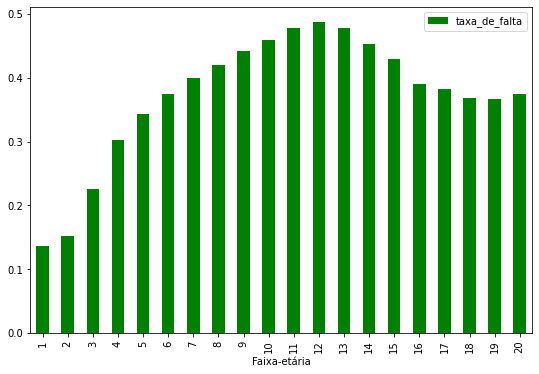

In [ ]:
#Taxa de faltas por estado
faixa_etaria_count['taxa_de_falta'] = faixa_etaria_count.Ausentes / (faixa_etaria_count.Presentes +  faixa_etaria_count.Ausentes) 
faixa_etaria_count[['Faixa-etária', 'taxa_de_falta']].plot.bar(x='Faixa-etária', color = 'green')

27 27


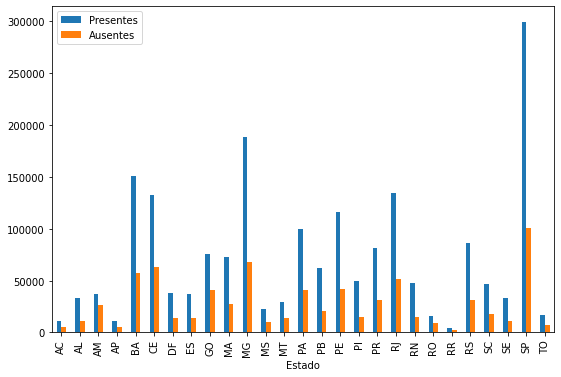

In [ ]:
#Candidatos por estado
presentes = []
ausentes = []
for cat in df.SG_UF_PROVA.cat.categories:
  presentes.append((df_presentes.SG_UF_PROVA==cat).sum())
  ausentes.append((df_ausentes.SG_UF_PROVA==cat).sum())
print(len(presentes), len(ausentes))
tx_falta_estado = pd.DataFrame({"Presentes" : presentes, "Ausentes" : ausentes, 'Estado' : df_ausentes.SG_UF_PROVA.cat.categories})
tx_falta_estado.plot.bar(x='Estado')

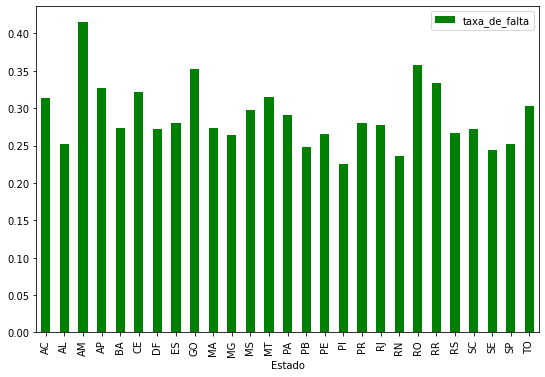

In [ ]:
#Taxa de faltas por estado
tx_falta_estado['taxa_de_falta'] = tx_falta_estado.Ausentes / (tx_falta_estado.Presentes +  tx_falta_estado.Ausentes) 
tx_falta_estado[['Estado', 'taxa_de_falta']].plot.bar(x='Estado', color = 'green')

# Pré Processamento 

## Tratamento de dados ausentes

In [ ]:
df.shape

(2685053, 76)

In [ ]:
print(df.isnull().sum())

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 1703735
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          1964743
NO_MUNICIPIO_ESC          1964743
CO_UF_ESC                 1964743
SG_UF_ESC                 1964743
TP_DEPENDENCIA_ADM_ESC    1964743
TP_LOCALIZACAO_ESC        1964743
TP_SIT_FUNC_ESC           1964743
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN                744350
CO_PROVA_CH                643280
CO_PROVA_LC   

In [ ]:
# A priori, removeremos as colunas quase vazias
processed_df = df.dropna(thresh=0.5*len(df), axis=1).copy()

In [ ]:
print(processed_df.shape)
print(processed_df.isnull().sum())

(2685053, 68)
NU_INSCRICAO               0
NU_ANO                     0
TP_FAIXA_ETARIA            0
TP_SEXO                    0
TP_ESTADO_CIVIL            0
TP_COR_RACA                0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
CO_MUNICIPIO_PROVA         0
NO_MUNICIPIO_PROVA         0
CO_UF_PROVA                0
SG_UF_PROVA                0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
CO_PROVA_CN           744350
CO_PROVA_CH           643280
CO_PROVA_LC           643280
CO_PROVA_MT           744350
NU_NOTA_CN            744350
NU_NOTA_CH            643280
NU_NOTA_LC            643280
NU_NOTA_MT            744350
TX_RESPOSTAS_CN       744350
TX_RESPOSTAS_CH       643280
TX_RESPOSTAS_LC       643280
TX_RESPOSTAS_MT       744350
TP_LINGUA                  0
TX_GABARITO_CN        744350
TX_GABARITO_CH        643280


In [ ]:
# Como o conjunto de dados é muito grande, removeremos todas as linhas com pelo menos uma coluna de ausentes
# Fazer isso excluirá os alunos faltantes, mas eles já foram analisados no início do código
processed_df.dropna(inplace=True)
processed_df.reset_index(drop=True, inplace=True)

In [ ]:
#Reduzimos o dataset em aproximadamente 20% do tamanho original
print(processed_df.shape)
print(processed_df.isnull().sum())

(1934540, 68)
NU_INSCRICAO          0
NU_ANO                0
TP_FAIXA_ETARIA       0
TP_SEXO               0
TP_ESTADO_CIVIL       0
TP_COR_RACA           0
TP_NACIONALIDADE      0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
TP_ESCOLA             0
IN_TREINEIRO          0
CO_MUNICIPIO_PROVA    0
NO_MUNICIPIO_PROVA    0
CO_UF_PROVA           0
SG_UF_PROVA           0
TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
TP_PRESENCA_MT        0
CO_PROVA_CN           0
CO_PROVA_CH           0
CO_PROVA_LC           0
CO_PROVA_MT           0
NU_NOTA_CN            0
NU_NOTA_CH            0
NU_NOTA_LC            0
NU_NOTA_MT            0
TX_RESPOSTAS_CN       0
TX_RESPOSTAS_CH       0
TX_RESPOSTAS_LC       0
TX_RESPOSTAS_MT       0
TP_LINGUA             0
TX_GABARITO_CN        0
TX_GABARITO_CH        0
TX_GABARITO_LC        0
TX_GABARITO_MT        0
TP_STATUS_REDACAO     0
NU_NOTA_COMP1         0
NU_NOTA_COMP2         0
NU_NOTA_COMP3         0
NU_NOTA_COMP4         0
NU

In [ ]:
processed_df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210052384164,2021,12,M,1,1,1,1,11,1,0,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
1,210052128335,2021,3,M,1,3,1,2,0,2,0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
2,210051353021,2021,2,F,1,3,1,2,0,2,0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
3,210053417016,2021,8,F,1,3,1,2,0,2,0,3106200,Belo Horizonte,31,MG,1,1,1,1,910.0,879.0,889.0,900.0,487.4,476.5,450.7,493.4,BBBDCCBDCCEDBBBCACEBCDADEEADCDEBEDDEBBEBEEECB,BDBCDAAEEBEAABEDEBAACCCCBABCCAAEBBCABAEAEDEDA,BADBB99999BDDEDAEEEDEDADEAEAEBAAECBCADADDCEDAB...,CBBCCDDEEEBCBCAEBBEDEACBCABCAEBADCEABEEBCBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,80.0,100.0,100.0,520.0,B,B,B,B,2.0,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B
4,210051128744,2021,4,F,1,3,1,2,0,2,0,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,D,D,D,B,2.0,B,A,B,B,A,A,B,B,C,A,B,A,B,C,B,A,C,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934535,210051820540,2021,2,F,1,3,1,3,0,1,1,2313005,Solonópole,23,CE

## Selecionando subconjunto para análise




In [ ]:
subdf = processed_df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'CO_MUNICIPIO_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006',
       'Q025']]
subdf

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025
0,12,M,1,1,1,2704302,505.9,551.8,498.3,461.5,1,1.0,560.0,B,B,3.0,B,A
1,3,M,3,2,2,2304202,580.7,678.9,638.9,659.5,0,1.0,780.0,B,B,6.0,B,B
2,2,F,3,2,2,2300150,497.7,532.4,457.6,582.6,1,1.0,780.0,D,E,4.0,C,B
3,8,F,3,2,2,3106200,487.4,476.5,450.7,493.4,0,1.0,520.0,B,B,2.0,B,B
4,4,F,3,2,2,2927200,507.6,539.2,494.6,413.3,1,1.0,380.0,D,D,2.0,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934535,2,F,3,3,1,2313005,437.6,516.7,542.6,407.4,1,1.0,540.0,B,G,3.0,B,B
1934536,5,M,2,2,2,2914703,484.6,434.8,424.6,394.8,1,1.0,560.0,H,E,6.0,B,B
1934537,4,M,1,2,2,3205002,626.3,672.2,663.2,731.3,0,1.0,680.0,G,G,5.0,C,B
1934538,4,F,3,2,2,2702306,535.2,461.6,510.8,599.9,1,1.0,800.0,D,D,5.0,A,B


## Semântica dos atributos

### Acrescentado informações dos municipios


In [ ]:
# Dá para usar esse dataset para obter mais informações sobre o local de prova a partir de CO_MUNICIPIO_PROVA
municipios = pd.read_csv("https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv")
estados = pd.read_csv('https://raw.githubusercontent.com/leogermani/estados-e-municipios-ibge/master/estados.csv')
municipios = municipios.merge(estados, left_on = 'codigo_uf', right_on='COD')[['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'NOME', 'SIGLA']]
municipios.rename(columns={'NOME':'uf', 'SIGLA': 'sigla_uf'}, inplace=True)
municipios.codigo_ibge = municipios.codigo_ibge.astype('category')
municipios

,codigo_ibge,nome,latitude,longitude,capital,uf,sigla_uf
0,5200050,Abadia de Goiás,-16.7573,-49.4412,0,Goiás,GO
1,5200100,Abadiânia,-16.1970,-48.7057,0,Goiás,GO
2,5200134,Acreúna,-17.3960,-50.3749,0,Goiás,GO
3,5200159,Adelândia,-16.4127,-50.1657,0,Goiás,GO
4,5200175,Água Fria de Goiás,-14.9778,-47.7823,0,Goiás,GO
...,...,...,...,...,...,...,...
5565,3306107,Valença,-22.2445,-43.7129,0,Rio de Janeiro,RJ
5566,3306156,Varre-Sai,-20.9276,-41.8701,0,Rio de Janeiro,RJ
5567,3306206,Vassouras,-22.4059,-43.6686,0,Rio de Janeiro,RJ
5568,3306305,Volta Redonda,-22.5202,-44.0996,0,Rio de Janeiro,RJ


In [ ]:
subdf['latitude'] = subdf.merge(municipios,right_on='codigo_ibge',left_on='CO_MUNICIPIO_PROVA')['latitude']
subdf['longitude'] = subdf.merge(municipios,right_on='codigo_ibge',left_on='CO_MUNICIPIO_PROVA')['longitude']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
subdf['crossed_location'] = subdf['latitude']*subdf['longitude']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### codigos -> valores

In [ ]:
faixaEtaria = [ 'menores de 17', '17', '18', '19', '20', '21', '22', '23', '24', 
               '25', '26', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
               '56-60', '61-65', '66-70', 'maiores de 70' ]
faixaEtaria = np.array(faixaEtaria)
faixaEtaria

array(['menores de 17', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
       '56-60', '61-65', '66-70', 'maiores de 70'], dtype='<U13')

In [ ]:
cor = ['não declarada', 
       'branca', 
       'preta', 
       'parda', 
       'amarela', 
       'indígena', 
       'não sabe']

In [ ]:
situacaoEM = ['concluido',
              'a concluir em 2021',
              'a concluir após 2021',
              'não cursado']

In [ ]:
anoConclusao = ['nao informado','antes de 2007']
anoConclusao[1:1] = range(2020, 2006, -1)
anoConclusao

['nao informado',
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 'antes de 2007']

In [ ]:
tipoEscola = ['Não respondeu', 'Pública', 'Privada']

In [ ]:
subdf.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q025', 'latitude',
       'longitude', 'crossed_location'],
      dtype='object')

In [ ]:
subdf.rename(columns = {'Q001':'EscolaridadePai', 'Q002':'EscolaridadeMae', 'Q005':'PessoasNaCasa', 'Q006':'RendaFamiliar', 'Q025':'AcessoAInternet'}, inplace = True)
subdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,EscolaridadePai,EscolaridadeMae,PessoasNaCasa,RendaFamiliar,AcessoAInternet,latitude,longitude,crossed_location
0,12,M,1,1,1,2704302,505.9,551.8,498.3,461.5,1,1.0,560.0,B,B,3.0,B,A,-9.66599,-35.7350,345.414153
1,3,M,3,2,2,2304202,580.7,678.9,638.9,659.5,0,1.0,780.0,B,B,6.0,B,B,-9.66599,-35.7350,345.414153
2,2,F,3,2,2,2300150,497.7,532.4,457.6,582.6,1,1.0,780.0,D,E,4.0,C,B,-9.66599,-35.7350,345.414153
3,8,F,3,2,2,3106200,487.4,476.5,450.7,493.4,0,1.0,520.0,B,B,2.0,B,B,-9.66599,-35.7350,345.414153
4,4,F,3,2,2,2927200,507.6,539.2,494.6,413.3,1,1.0,380.0,D,D,2.0,B,B,-9.66599,-35.7350,345.414153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934535,2,F,3,3,1,2313005,437.6,516.7,542.6,407.4,1,1.0,540.0,B,G,3.0,B,B,-1.88237,-66.9291,125.985330
1934536,5,M,2,2,2,2914703,484.6,434.8,424.6,394.8,1,1.0,560.0,H,E,6.0,B,B,-1.88237,-66.9291,125.985330
1934537,4,M,1,2,2,3205002,626.3,672.2,663.2,731.3,0,1.0,680.0,G,G,5.0,C,B,-1.88237,-66.9291,125.985330
1934538,4,F,3,2,2,2702306,535.2,461.6,510.8,599.9,1,1.0,800.0,D,D,5.0,A,B,-1.88237,-66.9291,125.985330


### Renda Per Capta 
   Derivando um novo campo com informações à respeito da renda familiar per capta do participante - informação de grande relevância, haja vista que ela é o critério para a concessão de cotas para jovens de baixa renda.

  Para tanto, são usados os campos:
*  Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência? Com valores de 1 a 20
*  Q006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.) Com varlores representando intervalos em salários mínimos.

Para estimar a renda per capta dos participantes, foi considerado que a sua renda familiar bruta seja o valor mais alto da categoria em que se enquadra. Por exemplo, uma renda entre 7 e 8 salários mínimos, foi representada como 8 salários mínimos.

A última categoria de Q006 não possui limite superior, daí os participantes com renda familiar acima de 20 salários, foram classificados como tendo renda per capta acima de 4 salários, independente de quantas pessoas morem na casa.


In [ ]:
dd = subdf[['PessoasNaCasa', 'RendaFamiliar']].astype('object')
ddf = {'Salarios': dd.RendaFamiliar}
ddf = pd.DataFrame(ddf)
ddf

,Salarios
0,B
1,B
2,C
3,B
4,B
...,...
1934535,B
1934536,B
1934537,C
1934538,A


In [ ]:
ddf.dtypes

Salarios    object
dtype: object

In [ ]:
ddf.loc[ddf.Salarios == 'A', ['Salarios']] = 0
ddf.loc[ddf.Salarios == 'B', ['Salarios']] = 1
ddf.loc[ddf.Salarios == 'C', ['Salarios']] = 1.5
ddf.loc[ddf.Salarios == 'D', ['Salarios']] = 2
ddf.loc[ddf.Salarios == 'E', ['Salarios']] = 2.5
ddf.loc[ddf.Salarios == 'F', ['Salarios']] = 3
ddf.loc[ddf.Salarios == 'G', ['Salarios']] = 4
ddf.loc[ddf.Salarios == 'H', ['Salarios']] = 5
ddf.loc[ddf.Salarios == 'I', ['Salarios']] = 6
ddf.loc[ddf.Salarios == 'J', ['Salarios']] = 7
ddf.loc[ddf.Salarios == 'K', ['Salarios']] = 8
ddf.loc[ddf.Salarios == 'L', ['Salarios']] = 9
ddf.loc[ddf.Salarios == 'M', ['Salarios']] = 10
ddf.loc[ddf.Salarios == 'N', ['Salarios']] = 12
ddf.loc[ddf.Salarios == 'O', ['Salarios']] = 15
ddf.loc[ddf.Salarios == 'P', ['Salarios']] = 20
ddf.loc[ddf.Salarios == 'Q', ['Salarios']] = 20000

In [ ]:
dd = dd.merge(ddf, left_index=True, right_index=True)[['PessoasNaCasa', 'Salarios']]

In [ ]:
dd.convert_dtypes()
dd.dtypes

PessoasNaCasa    object
Salarios         object
dtype: object

In [ ]:
pd.unique(dd.Salarios)

array([1, 1.5, 2, 4, 5, 3, 2.5, 0, 6, 7, 15, 8, 10, 20000, 12, 9, 20],
      dtype=object)

In [ ]:
dd['perCapta'] = dd.Salarios/dd.PessoasNaCasa

Discretizando o campo calculado em categorias de renda per capta:




*   a: <= 0.5
*   b: <= 1
*   c: <= 1.5
*   d: <= 2
*   e: <= 3
*   f: <= 4
*   g: > 4

In [ ]:
ddf = {'categoria': dd.perCapta}
ddf = pd.DataFrame(ddf)
ddf.dtypes

categoria    object
dtype: object

In [ ]:
ddf.loc[dd.perCapta <= 0.5, ['categoria']] = 'A'
ddf.loc[(dd.perCapta <= 1) & (dd.perCapta > 0.5), ['categoria']] = 'B'
ddf.loc[(dd.perCapta <= 1.5) & (dd.perCapta > 1), ['categoria']] = 'C'
ddf.loc[(dd.perCapta <= 2) & (dd.perCapta > 1.5), ['categoria']] = 'D'
ddf.loc[(dd.perCapta <= 3) & (dd.perCapta > 2), ['categoria']] = 'E'
ddf.loc[(dd.perCapta <= 4) & (dd.perCapta > 3), ['categoria']] = 'F'
ddf.loc[(dd.perCapta > 4), ['categoria']] = 'G'
ddf

,categoria
0,A
1,A
2,A
3,A
4,A
...,...
1934535,A
1934536,A
1934537,A
1934538,A


In [ ]:
ddf


,categoria
0,A
1,A
2,A
3,A
4,A
...,...
1934535,A
1934536,A
1934537,A
1934538,A


In [ ]:
dd = dd.merge(ddf, left_index=True, right_index=True)[['Salarios',	'perCapta', 'categoria']]

In [ ]:
subdf = subdf.merge(dd, left_index=True, right_index=True)

In [ ]:
subdf = subdf.convert_dtypes()

In [ ]:
subdf['categoria'] = subdf['categoria'].astype('category')

## Detecção de outliers
Nesta sessão, buscaremos identificar resultados 'anômalos' de participantes de Pernambuco que estudaram o ensino médio em escolas públicas.

### Pré-processamento

#### Categoria -> Número

In [ ]:
subdf.dtypes

TP_FAIXA_ETARIA       category
TP_SEXO               category
TP_COR_RACA           category
TP_ST_CONCLUSAO       category
TP_ESCOLA             category
CO_MUNICIPIO_PROVA    category
NU_NOTA_CN             Float64
NU_NOTA_CH             Float64
NU_NOTA_LC             Float64
NU_NOTA_MT             Float64
TP_LINGUA             category
TP_STATUS_REDACAO     category
NU_NOTA_REDACAO          Int64
EscolaridadePai       category
EscolaridadeMae       category
PessoasNaCasa         category
RendaFamiliar         category
AcessoAInternet       category
latitude               Float64
longitude              Float64
crossed_location       Float64
Salarios               Float64
perCapta               Float64
categoria             category
dtype: object

In [ ]:
amostraPE = subdf[subdf[['CO_MUNICIPIO_PROVA']].merge(municipios[['codigo_ibge', 'uf']], left_on = 'CO_MUNICIPIO_PROVA', right_on = 'codigo_ibge')['uf'] == 'Pernambuco'].sample(5000, random_state = 16)
amostraPE.dtypes

TP_FAIXA_ETARIA       category
TP_SEXO               category
TP_COR_RACA           category
TP_ST_CONCLUSAO       category
TP_ESCOLA             category
CO_MUNICIPIO_PROVA    category
NU_NOTA_CN             Float64
NU_NOTA_CH             Float64
NU_NOTA_LC             Float64
NU_NOTA_MT             Float64
TP_LINGUA             category
TP_STATUS_REDACAO     category
NU_NOTA_REDACAO          Int64
EscolaridadePai       category
EscolaridadeMae       category
PessoasNaCasa         category
RendaFamiliar         category
AcessoAInternet       category
latitude               Float64
longitude              Float64
crossed_location       Float64
Salarios               Float64
perCapta               Float64
categoria             category
dtype: object

In [ ]:
amostraPE = amostraPE[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'EscolaridadePai', 'EscolaridadeMae',
       'PessoasNaCasa', 'RendaFamiliar', 'AcessoAInternet', 'categoria']]

In [ ]:
amostraPE['categoria'] = amostraPE['categoria'].astype('category')

In [ ]:
for chave in amostraPE.columns:
  try:
    amostraPE[chave] = amostraPE[chave].cat.codes
  except:
    pass

In [ ]:
amostraPE.dtypes

TP_FAIXA_ETARIA          int8
TP_SEXO                  int8
TP_COR_RACA              int8
TP_ST_CONCLUSAO          int8
TP_ESCOLA                int8
CO_MUNICIPIO_PROVA      int16
NU_NOTA_CN            Float64
NU_NOTA_CH            Float64
NU_NOTA_LC            Float64
NU_NOTA_MT            Float64
TP_LINGUA                int8
TP_STATUS_REDACAO        int8
NU_NOTA_REDACAO         Int64
EscolaridadePai          int8
EscolaridadeMae          int8
PessoasNaCasa            int8
RendaFamiliar            int8
AcessoAInternet          int8
categoria                int8
dtype: object

#### Normalização

In [ ]:
for chave in amostraPE.columns:
  amostraPE[chave] = (amostraPE[chave] - amostraPE[chave].min()) / (amostraPE[chave].max() - amostraPE[chave].min()) + 0.2

In [ ]:
amostraPE

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,EscolaridadePai,EscolaridadeMae,PessoasNaCasa,RendaFamiliar,AcessoAInternet,categoria
464098,0.258824,0.2,0.4,0.533333,0.7,0.241810,0.847133,0.881874,0.919702,0.767842,0.2,0.200000,0.893878,0.628571,0.771429,0.353846,0.3875,1.2,0.366667
705060,0.258824,0.2,0.4,0.866667,0.2,0.817984,0.964965,1.139088,1.145565,0.978307,0.2,0.200000,1.118367,0.628571,0.628571,0.430769,0.3875,1.2,0.200000
1080721,0.317647,1.2,0.8,0.533333,0.7,0.801947,0.70523,0.805302,0.792959,0.851202,1.2,0.200000,0.853061,0.200000,0.342857,0.353846,0.2625,1.2,0.200000
1698045,0.317647,1.2,0.4,0.533333,0.7,0.952577,0.81109,0.692972,0.822072,0.631522,1.2,0.200000,0.64898,0.628571,0.914286,0.430769,0.2625,1.2,0.200000
870578,0.200000,0.2,0.6,0.866667,0.2,0.952577,0.899559,0.98582,1.041842,0.937846,0.2,0.200000,0.893878,0.914286,0.914286,0.430769,1.1375,1.2,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840746,0.729412,1.2,0.8,0.200000,0.2,1.200000,0.844612,0.840321,0.76046,0.666794,1.2,0.485714,0.2,0.771429,0.914286,0.584615,0.4500,1.2,0.200000
1460237,0.494118,0.2,0.8,0.200000,0.2,0.259565,0.698299,0.788779,0.872986,0.664569,1.2,0.200000,0.689796,0.342857,0.342857,0.892308,0.2625,0.2,0.200000
515326,0.258824,0.2,0.4,0.533333,0.7,0.816266,0.888847,0.704316,0.897224,0.867726,0.2,0.200000,1.036735,0.771429,0.771429,0.353846,0.3250,1.2,0.200000
1561667,0.200000,0.2,0.8,0.866667,0.2,0.605498,0.646503,0.731073,0.701016,0.716894,0.2,0.200000,0.628571,0.485714,0.628571,0.507692,0.2625,1.2,0.200000


### Detecção de outliers

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#### Elliptic Envelope

Antes, verificar se os atributos seguem uma gaussiana

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f542b3c21d0>,
      dtype=object)

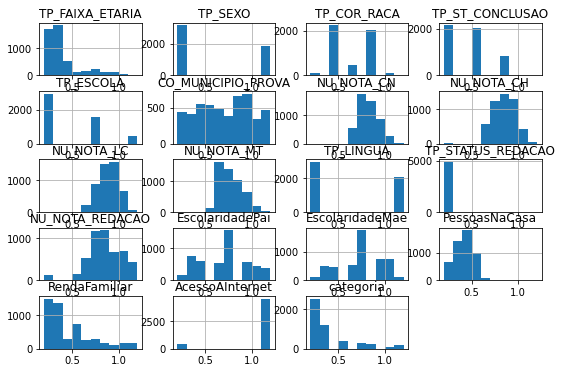

In [ ]:
amostraPE.hist()

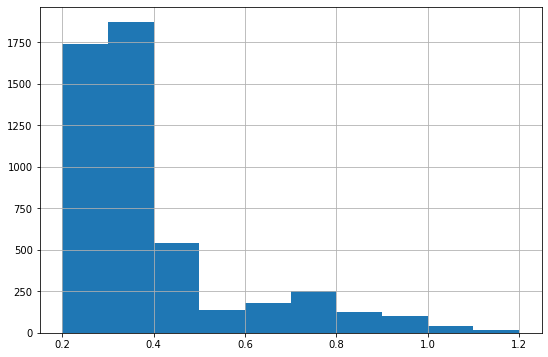

In [ ]:
amostraPE['TP_FAIXA_ETARIA'].hist()

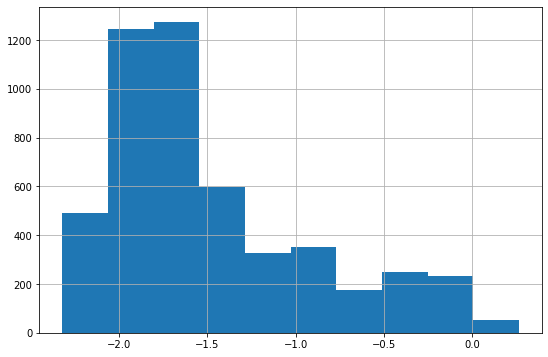

In [ ]:
np.log2(amostraPE['TP_FAIXA_ETARIA']).hist()

In [ ]:
d = stats.shapiro(np.log2(amostraPE['TP_FAIXA_ETARIA']))

##### **Não dá para usar**

Usando mesmo assim ficaria:

In [ ]:
ee = EllipticEnvelope(contamination=0.01)
ee.fit(amostraPE)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-142.342799407967505 > -282.413715805839786). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-142.083363092625859 > -280.738197789109336). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning,


EllipticEnvelope(contamination=0.01)

In [ ]:
eescores = ee.predict(amostraPE)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


#### Isolation Forrests

In [ ]:
rng = np.random.RandomState(42)
ifo = IsolationForest(max_samples=2000, random_state=rng)
ifo.fit(amostraPE)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


IsolationForest(max_samples=2000,
                random_state=RandomState(MT19937) at 0x7F5445DE99E0)

In [ ]:
ifoscores = ifo.predict(amostraPE)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


#### Local Outlier Factor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=10)

In [ ]:
lofscores = lof.fit_predict(amostraPE)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


#### votação

In [ ]:
amostraPE['ifo'] = ifoscores
(amostraPE['ifo'] == -1).sum()

591

In [ ]:
amostraPE['lof'] = lofscores
(amostraPE['lof'] == -1).sum()

84

In [ ]:
outlier = (amostraPE['lof'] + amostraPE['ifo']) < 0
print(outlier.sum())
amostraPE[outlier]

66


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,EscolaridadePai,EscolaridadeMae,PessoasNaCasa,RendaFamiliar,AcessoAInternet,categoria,ifo,lof
1031875,0.200000,0.2,0.4,0.866667,0.2,0.904467,0.874354,0.718372,0.760596,0.757674,0.2,0.628571,0.2,1.057143,1.057143,0.430769,0.9500,1.2,0.866667,-1,-1
851156,0.258824,0.2,0.8,0.533333,0.7,1.200000,0.714304,0.706782,0.693026,0.688402,1.2,0.771429,0.2,0.342857,0.342857,0.276923,0.2625,1.2,0.200000,-1,-1
723310,0.376471,1.2,0.4,0.533333,1.2,0.718328,0.749464,0.653761,0.711442,0.592967,0.2,0.485714,0.2,0.342857,0.485714,0.584615,0.2000,1.2,0.200000,-1,-1
848476,0.258824,0.2,0.8,0.866667,0.2,0.201145,0.719849,0.674599,0.709682,0.715729,0.2,0.628571,0.2,0.342857,0.628571,0.430769,0.4500,1.2,0.366667,-1,-1
1031219,0.552941,0.2,0.8,0.200000,0.2,0.360939,0.684058,0.673613,0.757075,0.711387,1.2,0.485714,0.2,0.485714,0.342857,0.430769,0.2625,0.2,0.200000,-1,-1
705650,1.082353,1.2,0.8,1.200000,0.2,1.197136,0.828355,0.902219,0.782668,0.770173,1.2,0.200000,0.567347,0.485714,0.485714,0.353846,0.3250,1.2,0.200000,-1,-1
368417,1.141176,1.2,0.4,0.200000,0.2,0.528751,0.9569,1.0291,0.892349,0.777163,0.2,0.200000,1.016327,0.200000,0.771429,0.430769,1.1375,1.2,1.200000,-1,-1
1515298,0.435294,0.2,0.4,0.866667,0.2,0.629553,0.712791,0.648829,0.746242,0.629721,1.2,0.200000,0.730612,1.057143,1.057143,0.584615,0.2000,0.2,0.200000,-1,-1
368040,0.847059,1.2,0.6,0.200000,0.2,1.200000,0.96799,1.058816,1.025051,1.088889,0.2,0.200000,1.016327,0.342857,0.771429,0.200000,0.7000,1.2,1.200000,-1,-1
708259,0.258824,0.2,0.8,0.533333,0.7,1.183391,0.889351,0.875462,0.920108,0.680352,1.2,0.771429,0.2,1.200000,0.628571,0.507692,0.3250,1.2,0.200000,-1,-1


#### Resgatando elementos

In [ ]:
iOutiliers = amostraPE[outlier].index

In [ ]:
subdf.iloc[iOutiliers.to_list()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,EscolaridadePai,EscolaridadeMae,PessoasNaCasa,RendaFamiliar,AcessoAInternet,latitude,longitude,crossed_location,Salarios,perCapta,categoria
1031875,1,F,1,3,1,3525904,535.1,420.4,414.0,526.5,0,4.0,0,G,G,4.0,M,B,-8.01017,-34.8545,279.19047,10.0,2.5,E
851156,2,F,3,2,2,5300108,408.1,411.0,364.1,461.1,1,6.0,0,B,B,2.0,B,B,-9.38866,-40.5027,380.266079,1.0,0.5,A
723310,4,M,1,2,3,3119401,436.0,368.0,377.7,371.0,0,3.0,0,B,C,6.0,A,B,-8.04666,-34.8771,280.644165,0.0,0.0,A
848476,2,F,3,3,1,1100049,412.5,384.9,376.4,486.9,0,4.0,0,B,D,4.0,E,B,-9.38866,-40.5027,380.266079,2.5,0.625,B
1031219,7,F,3,1,1,2110609,384.1,384.1,411.4,482.8,1,3.0,0,C,B,4.0,B,A,-8.01017,-34.8545,279.19047,1.0,0.25,A
705650,16,M,3,4,1,5220454,498.6,569.5,430.3,538.3,1,1.0,360,C,C,3.0,C,B,-8.04666,-34.8771,280.644165,1.5,0.5,A
368417,17,M,1,1,1,2604106,600.6,672.4,511.3,544.9,0,1.0,800,A,E,4.0,P,B,-7.50484,-35.3119,265.01016,20.0,5.0,G
1515298,5,F,1,3,1,2913705,406.9,364.0,403.4,405.7,1,1.0,520,G,G,6.0,A,A,-9.11125,-37.1226,338.233289,0.0,0.0,A
368040,12,M,2,1,1,5300108,609.4,696.5,609.3,839.2,0,1.0,800,B,E,1.0,I,B,-7.50484,-35.3119,265.01016,6.0,6.0,G
708259,2,F,3,2,2,5211909,547.0,547.8,531.8,453.5,1,6.0,0,H,D,5.0,C,B,-8.04666,-34.8771,280.644165,1.5,0.3,A


In [ ]:
subdf.iloc[iOutiliers.to_list()].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,latitude,longitude,crossed_location,Salarios,perCapta
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,451.954545,462.095455,453.518182,494.430303,258.181818,-8.209955,-36.140086,297.316492,1820.765152,367.792617
std,103.192436,152.695829,105.435418,129.255277,322.065015,0.479343,1.833040,30.965944,5792.832718,1251.975010
min,0.000000,0.000000,0.000000,0.000000,0.000000,-9.388660,-41.009500,265.010160,0.000000,0.000000
25%,399.700000,384.300000,387.850000,413.375000,0.000000,-8.347975,-36.454775,279.477524,1.000000,0.250000
50%,423.600000,439.350000,438.350000,464.300000,0.000000,-8.046660,-35.311900,284.075995,1.500000,0.500000
75%,476.550000,556.800000,513.925000,537.725000,490.000000,-7.999535,-34.877100,305.342822,4.000000,2.000000
max,737.900000,779.300000,697.900000,839.200000,980.000000,-7.469450,-34.854500,380.266079,20000.000000,6666.666667


# Análise Descritiva

In [ ]:
# Analisando a correlação pelo método spearman 
subdf.corr(method='spearman')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,latitude,longitude,crossed_location,Salarios,perCapta
NU_NOTA_CN,1.000000,0.668358,0.666107,0.613494,0.496189,0.001467,-0.004312,0.000948,0.399232,0.405543
NU_NOTA_CH,0.668358,1.000000,0.766791,0.609954,0.524794,0.001184,-0.001968,0.000167,0.382954,0.394335
NU_NOTA_LC,0.666107,0.766791,1.000000,0.626245,0.548115,-0.000724,-0.002984,0.002112,0.422481,0.428068
NU_NOTA_MT,0.613494,0.609954,0.626245,1.000000,0.515394,-0.001780,-0.005032,0.004015,0.436823,0.431526
NU_NOTA_REDACAO,0.496189,0.524794,0.548115,0.515394,1.000000,0.003457,0.003065,-0.004559,0.336936,0.328815
latitude,0.001467,0.001184,-0.000724,-0.001780,0.003457,1.000000,0.382743,-0.985501,-0.015371,-0.014175
longitude,-0.004312,-0.001968,-0.002984,-0.005032,0.003065,0.382743,1.000000,-0.477890,-0.020226,-0.018857
crossed_location,0.000948,0.000167,0.002112,0.004015,-0.004559,-0.985501,-0.477890,1.000000,0.021485,0.020218
Salarios,0.399232,0.382954,0.422481,0.436823,0.336936,-0.015371,-0.020226,0.021485,1.000000,0.911414
perCapta,0.405543,0.394335,0.428068,0.431526,0.328815,-0.014175,-0.018857,0.020218,0.911414,1.000000


In [ ]:
subdf['avg_score'] = (subdf['NU_NOTA_CN'] + subdf['NU_NOTA_CH'] + subdf['NU_NOTA_LC'] +	subdf['NU_NOTA_MT'] + subdf['NU_NOTA_REDACAO'])/5

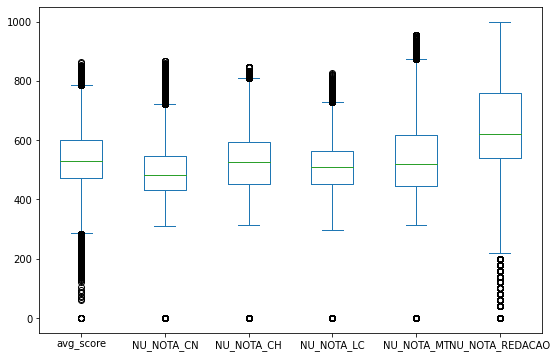

In [ ]:
notas = ['avg_score','NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT', 'NU_NOTA_REDACAO']
plt.rcParams["figure.figsize"] = [9, 6]
subdf[notas].plot(kind='box')

In [ ]:
avgs = []
boxes = pd.DataFrame()
for i, nota in enumerate(notas):
  print(subdf[nota].describe())
  avgs.append(subdf[nota].mean())
  boxes['nota_{}'.format(i)] = subdf[nota]


count    1.934540e+06
mean     5.388330e+02
std      8.987000e+01
min      0.000000e+00
25%      4.735400e+02
50%      5.305000e+02
75%      5.990200e+02
max      8.626800e+02
Name: avg_score, dtype: float64
count    1.934540e+06
mean     4.931074e+02
std      8.150124e+01
min      0.000000e+00
25%      4.314000e+02
50%      4.826000e+02
75%      5.479000e+02
max      8.671000e+02
Name: NU_NOTA_CN, dtype: float64
count    1.934540e+06
mean     5.248284e+02
std      9.452805e+01
min      0.000000e+00
25%      4.505000e+02
50%      5.273000e+02
75%      5.936000e+02
max      8.469000e+02
Name: NU_NOTA_CH, dtype: float64
count    1.934540e+06
mean     5.060241e+02
std      7.835315e+01
min      0.000000e+00
25%      4.512000e+02
50%      5.093000e+02
75%      5.621000e+02
max      8.261000e+02
Name: NU_NOTA_LC, dtype: float64
count    1.934540e+06
mean     5.380493e+02
std      1.113496e+02
min      0.000000e+00
25%      4.465000e+02
50%      5.183000e+02
75%      6.179000e+02
max      9.

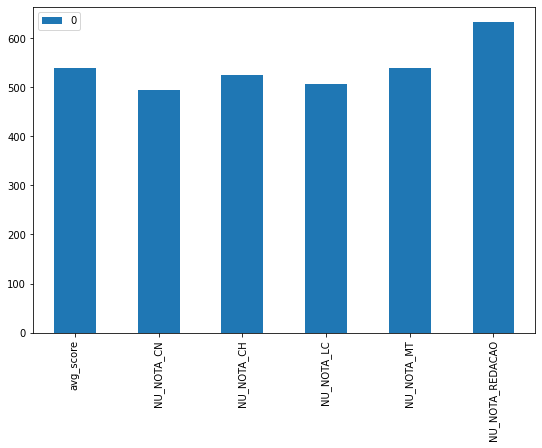

In [ ]:
avg_notas = pd.DataFrame(avgs, index=notas)
avg_notas.plot.bar()

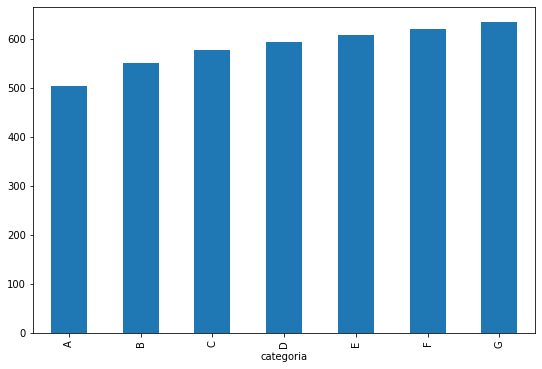

In [ ]:
subdf.groupby('categoria')['avg_score'].mean().plot(kind='bar')

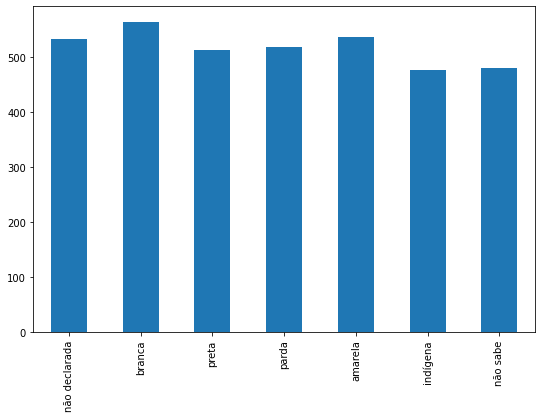

In [ ]:
cor_df = subdf.groupby('TP_COR_RACA')['avg_score'].mean()
cor_df.index = cor
cor_df.plot(kind='bar')

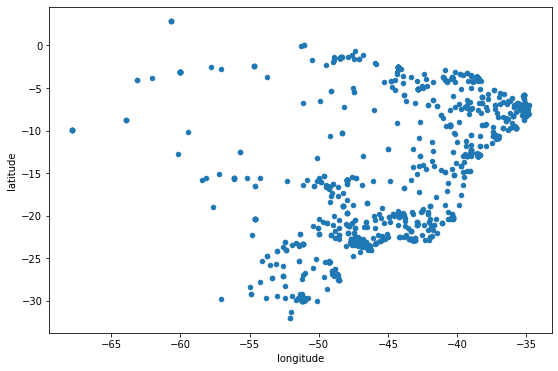

In [ ]:
sample = subdf.sample(1000)
sample.plot.scatter(x='longitude', y='latitude')

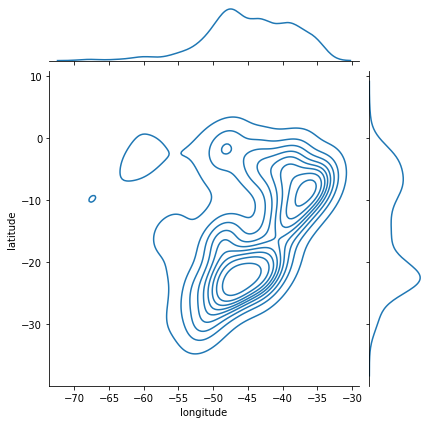

In [ ]:
import seaborn as sns
sns.jointplot(x=sample.longitude, y=sample.latitude, kind = 'kde')

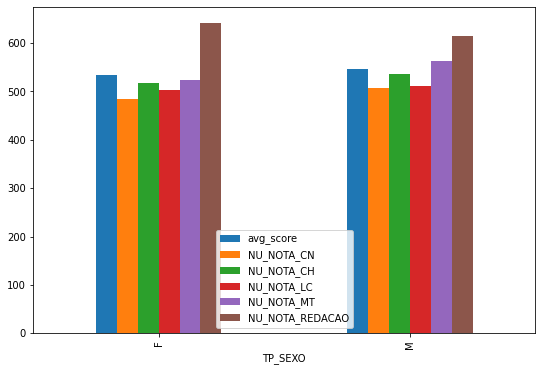

In [ ]:
df_sexo = pd.DataFrame()
for i, nota in enumerate(notas):
  df_sexo[nota] = subdf.groupby('TP_SEXO')[nota].mean()
df_sexo.plot(kind='bar')

# Testes de Hipótese

### lib

In [ ]:
def ehNormal (data, alpha):
  return (stats.shapiro(data).pvalue >= alpha/2)

def compararNotasDisciplina(df1, df2, disciplina, alpha = 0.05, alternativa = 'two-sided'):
  notas1 = df1['NU_NOTA_'+disciplina].to_numpy(float)
  notas2 = df2['NU_NOTA_'+disciplina].to_numpy(float)
  if ehNormal(notas1, alpha) and ehNormal(notas1, alpha): # se as distribuições seguem a normal
    if stats.bartlett(notas1, notas2).pvalue >= alpha/2: # se as distribuições tem o mesmo desvio padrão
      return (stats.ttest_ind(notas1, notas2, alternative = alternativa).pvalue >= alpha/2) # roda o t-teste multivariado
  #se chegar até aqui, o t-teste é inviavel, entao rodamos o Mann-Whitney U test
  resultado = stats.mannwhitneyu(notas1, notas2, alternative = alternativa)
  if alternativa == 'two-sided':
    # retorna se sao iguais ou nao
    return (resultado.pvalue > alpha/2)
  else:
    # retorna se aceita a hipotese alternativa ou nao
    return (resultado.pvalue <= alpha)
  
def compararNotas(df1, df2, alpha=0.05, alternativa = 'two-sided'):  
  for disciplina in ['LC', 'CH', 'MT', 'CN', 'REDACAO']:
    print(disciplina, compararNotasDisciplina(df1, df2, disciplina, alpha, alternativa))


# visualizar distribuições
def visDistros(df1, df2, l1, l2):
  n = min(df1.size, df2.size)
  plt.hist(df1.sample(n, random_state=16).to_numpy(float), alpha=0.5, label=l1)
  plt.hist(df2.sample(n, random_state=16).to_numpy(float), alpha=0.5, label=l2)
  plt.legend(loc='upper right')
  plt.show()

notas = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']

### Machos e Fêmeas

In [ ]:
machos = subdf[subdf['TP_SEXO'] == 'M'].sample(5000, random_state = 16)
femeas = subdf[subdf['TP_SEXO'] == 'F'].sample(5000, random_state = 16)

In [ ]:
compararNotas(machos, femeas)

LC False
CH False
MT False
CN False
REDACAO False


#### As distribuições das notas não são iguais. Quem tem as melhores distribuições?

In [ ]:
compararNotas(machos, femeas, alternativa='greater')

LC True
CH True
MT True
CN True
REDACAO False


In [ ]:
compararNotas(femeas, machos, alternativa='greater')

LC False
CH False
MT False
CN False
REDACAO True


A distribuição das notas em redação das mulheres é estocasticamente maior do que a distribuição equivalente dos homens. Para as distribuições das demais notas, as dos homens são maiores.

#### Visualização da distribuição das notas de redação dos grupos

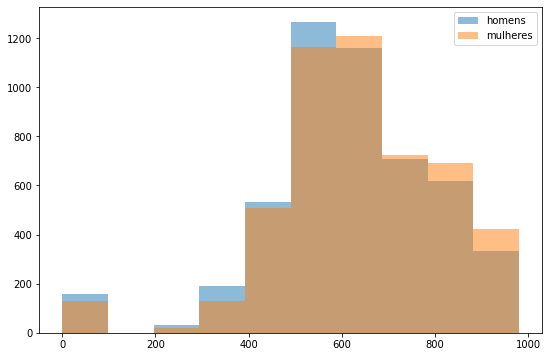

In [ ]:
visDistros(machos['NU_NOTA_REDACAO'], femeas['NU_NOTA_REDACAO'], 'homens', 'mulheres')

### Alunos de diferentes locais em MG.

#### Separando as regiões norte e sul de Minas de acordo com a latitude

In [ ]:
subdf.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ESCOLA', 'CO_MUNICIPIO_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'EscolaridadePai', 'EscolaridadeMae',
       'PessoasNaCasa', 'RendaFamiliar', 'AcessoAInternet', 'latitude',
       'longitude', 'crossed_location', 'Salarios', 'perCapta', 'categoria',
       'avg_score'],
      dtype='object')

In [ ]:
minasGererais = subdf[subdf[['CO_MUNICIPIO_PROVA']].merge(municipios[['codigo_ibge', 'uf']], left_on = 'CO_MUNICIPIO_PROVA', right_on = 'codigo_ibge')['uf'] == 'Minas Gerais'].sample(5000, random_state = 16)

In [ ]:
latMeio = ((minasGererais['latitude'].max() - minasGererais['latitude'].min())/2) + minasGererais['latitude'].min()
latMeio

-18.803449999999998

In [ ]:
minasSul = minasGererais[minasGererais['latitude'] < latMeio]
minasNorte = minasGererais[minasGererais['latitude'] >= latMeio]

In [ ]:
print(minasSul['latitude'].size, minasNorte['latitude'].size)

4042 958


#### Obtendo resultados

In [ ]:
notasMGS = minasSul[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
notasMGN = minasNorte[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]

In [ ]:
notasMGS.describe().loc['mean'] - notasMGN.describe().loc['mean']

NU_NOTA_LC          2.743067
NU_NOTA_CH          0.892110
NU_NOTA_MT          1.229691
NU_NOTA_CN          3.289542
NU_NOTA_REDACAO    24.383979
Name: mean, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f543f8f4e50>,
      dtype=object)

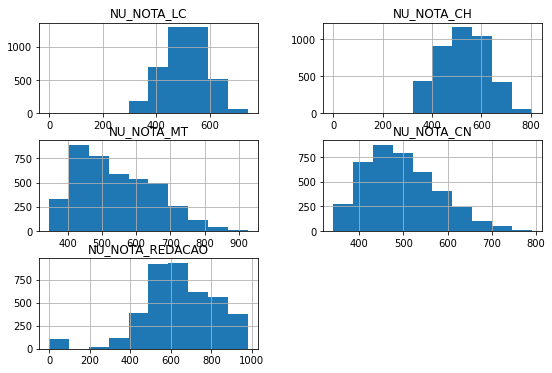

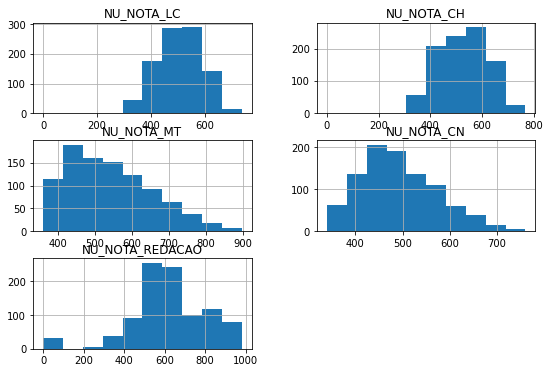

In [ ]:
notasMGS.hist()
notasMGN.hist()

In [ ]:
stats.shapiro(notasMGS['NU_NOTA_CH']).pvalue

1.34757416569869e-23

In [ ]:
compararNotas(notasMGS, notasMGN)

LC True
CH True
MT True
CN True
REDACAO False


In [ ]:
compararNotasDisciplina(notasMGS, notasMGN, 'REDACAO', alternativa = 'greater')

True

A distribuição das notas em redação dos participantes da parte sul são maiores. 

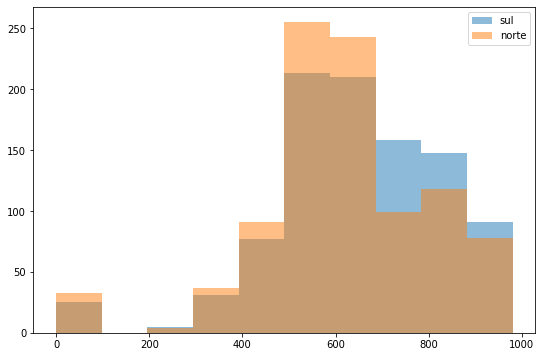

In [ ]:
visDistros(notasMGS['NU_NOTA_REDACAO'], notasMGN['NU_NOTA_REDACAO'], 'sul', 'norte')

### Notas de diferentes estados

In [ ]:
pernambucanos = subdf[subdf[['CO_MUNICIPIO_PROVA']].merge(municipios[['codigo_ibge', 'uf']], left_on = 'CO_MUNICIPIO_PROVA', right_on = 'codigo_ibge')['uf'] == 'Pernambuco'].sample(5000, random_state = 16)

In [ ]:
paulistas = subdf[subdf[['CO_MUNICIPIO_PROVA']].merge(municipios[['codigo_ibge', 'uf']], left_on = 'CO_MUNICIPIO_PROVA', right_on = 'codigo_ibge')['uf'] == 'São Paulo'].sample(5000, random_state = 16)

A distribuição das notas dos pernambucanos é igual à dos paulistas?

In [ ]:
compararNotas(pernambucanos, paulistas)

LC True
CH True
MT True
CN True
REDACAO True


R: Sim.

### Cotas raciais

Cotas raciais são aplicáveis para alunos de escolas públicas.
Dados os participantes que estudaram o ensino médio em escolas públicas, queremos comparar as distribuições de notas de participantes elegíveis e não elegíveis a cotas raciais.

In [ ]:
for i in np.unique(subdf.TP_COR_RACA):
  print(i, cor[i])

0 não declarada
1 branca
2 preta
3 parda
4 amarela
5 indígena
6 não sabe


In [ ]:
np.unique(subdf.TP_ESCOLA)

array([1, 2, 3])

In [ ]:
for i in np.unique(subdf.TP_ESCOLA):
  print(i, tipoEscola[i-1])

1 Não respondeu
2 Pública
3 Privada


In [ ]:
populares = subdf[subdf.TP_ESCOLA == 2]
elegiveis = populares[notas][populares.TP_COR_RACA.isin([2, 3, 5])].sample(5000, random_state=16)
nElegiveis = populares[notas][populares.TP_COR_RACA.isin([0, 1, 4, 6])].sample(5000, random_state=16)

In [ ]:
compararNotas(elegiveis, nElegiveis)

LC False
CH False
MT False
CN False
REDACAO False


Os dois grupos não têm distribuições iguais.

Como se dá tal desigualdade?

In [ ]:
# As distribuições das notas dos estudantes de escolas públicas autodeclarados
# pretos, pardos ou indígenas são menores das dos demais?
compararNotas(elegiveis, nElegiveis, alternativa='less')

LC True
CH True
MT True
CN True
REDACAO True


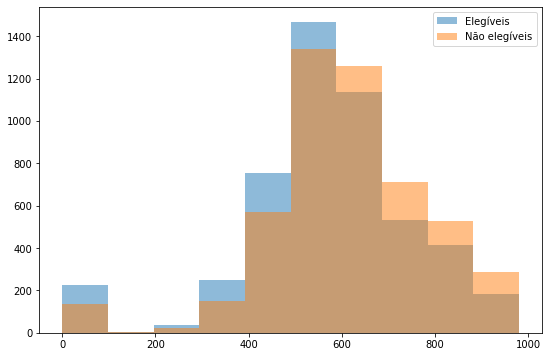

In [ ]:
visDistros(elegiveis['NU_NOTA_REDACAO'], nElegiveis['NU_NOTA_REDACAO'], 'Elegíveis', 'Não elegíveis')

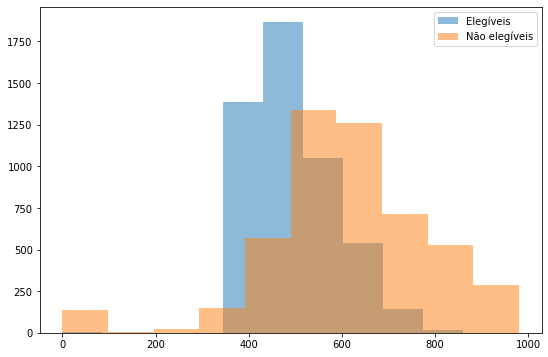

In [ ]:
visDistros(elegiveis['NU_NOTA_MT'], nElegiveis['NU_NOTA_REDACAO'], 'Elegíveis', 'Não elegíveis')